<a href="https://colab.research.google.com/github/bluewink/dataQualityClassifier/blob/master/myfirst_wordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

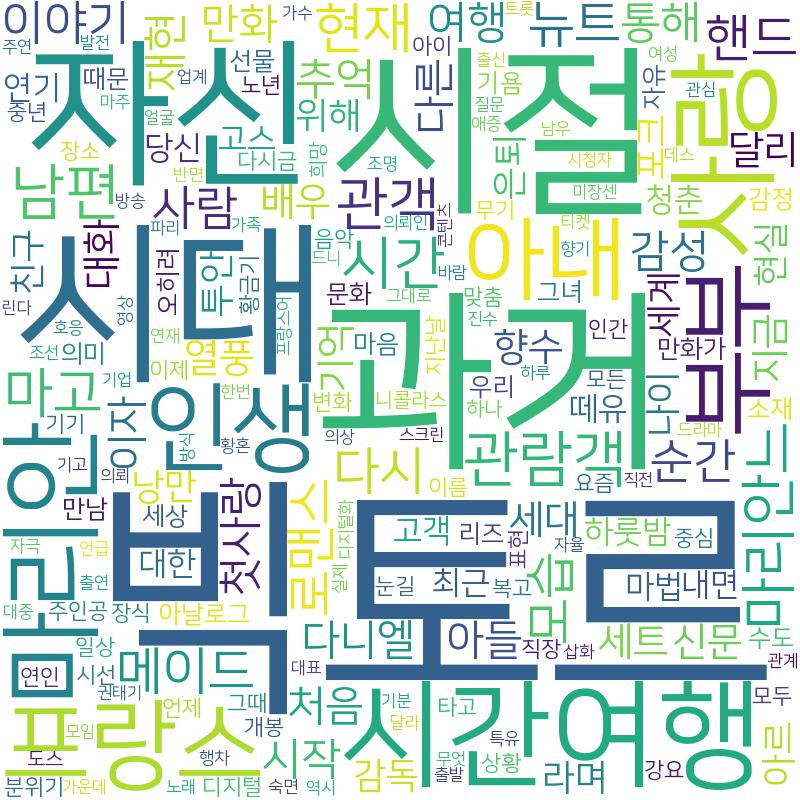

In [31]:

from wordcloud import WordCloud
import re
from konlpy.tag import Okt
from IPython.display import Image

okt = Okt() # 반드시 전역 변수에서 한번만 실행하자

r = open('article.txt', mode = 'rt', encoding='utf-8')  #file open

txt = r.readlines() #줄 단위로 저장

def count_words(article):   #어절별 빈도수 세기
    word_counts= {}
    for str in article:         
        str = re.sub('\s'," ", str)     #텍스트파일 전처리. 불필요한 특수문자 제거

        nouns = okt.nouns(str)          #명사 추출 라이브러리 
        
        for noun in nouns:
            if len(noun) == 1:          #빈도수 세기
                continue
            if noun not in word_counts:
                word_counts[noun] =0    #빈도수 사전에 저장
            word_counts[noun] += 1
    return word_counts


word_count = {}
word_count = count_words(txt)

word_count.pop('영화')              #stopwords 설정
word_count.pop('카페')
word_count.pop('벨에포크')
wc = WordCloud(                     #워드 클라우드 옵션 설정
    font_path='/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
    background_color='white',
    width=800,
    height=800
)
wc_img = wc.generate_from_frequencies(word_count)   #빈도수로 워드클라우드 그리기
wc_img.to_file('first_wordcloud.jpg')       # img 파일로 저장
Image('first_wordcloud.jpg')